In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/cs018_cs023_classification_assignment/')
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1nN3Ewx4GuMl04NbaeS2G5F5t3W7cj84d/assign_deep/aug'

Load Aug PCB

In [0]:
#shuffle data
import numpy as np
data=np.load("/content/drive/My Drive/cs018_cs023_classification_assignment/xtrain.npy")
label=np.load("/content/drive/My Drive/cs018_cs023_classification_assignment/ytrain.npy")
#np.random.shuffle(data)
print(data.shape)
print(label.shape)



(5040, 300, 300, 3)
(5040,)


In [0]:
np.random.shuffle(data)

In [0]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(data, label, test_size=0.2)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
del data
del label

(4032, 300, 300, 3) (4032,)
(1008, 300, 300, 3) (1008,)


In [0]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf

In [0]:
from keras.utils import to_categorical #we need to apply the to_categorical  function which converts our labels from integers to a vector,
                                      # where each vector ranges from [0, classes] . 
y_train = to_categorical(y_train)                               
y_test  =  to_categorical(y_test)
print(y_test[0])

[0. 1.]


Using TensorFlow backend.


In [0]:
#keras.utils.normalize(a, axis=-1, order=2)
import numpy as np
print (np.max(x_train),np.max(x_test))
print (np.min(x_train),np.min(x_test))

print (np.max(y_train),np.max(y_test))
print (np.min(y_train),np.min(y_test))

mean = np.mean(x_train)
std  = np.std(x_train)

print(mean)
print(std)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

print (np.max(x_train),np.max(x_test))
print (np.min(x_train),np.min(x_test))

1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.20798723
0.20723128
3.8218784 3.8218784
-1.0036478 -1.0036478


In [0]:
import keras
from keras import models
from keras import layers

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(300,300,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 296, 296, 6)       456       
_________________________________________________________________
average_pooling2d_1 (Average (None, 148, 148, 6)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 16)      2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 72, 72, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               9953400   
______________________________________

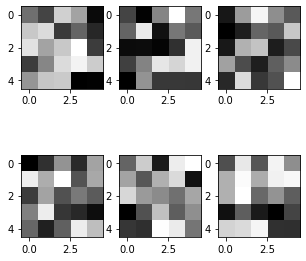

In [0]:
import matplotlib.pyplot as plt
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
def step_decay(epoch):
	initial_lrate = 0.001
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
os.chdir('/content/drive/My Drive/cs018_cs023_classification_assignment')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

mc = ModelCheckpoint('pcb.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

filepath = "saved-model-{epoch:02d}.h5"

#mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)

cv = keras.callbacks.CSVLogger('pcb.csv', separator=',', append=False)

#rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.00)

#es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

/content/drive/.shortcut-targets-by-id/1nN3Ewx4GuMl04NbaeS2G5F5t3W7cj84d/assign_deep/aug/old


In [0]:
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=50, verbose=1)

Train on 3225 samples, validate on 807 samples
Epoch 1/50
3225/3225 [==============================] - 128s 40ms/step - loss: 1.0021 - accuracy: 0.8313 - val_loss: 0.2106 - val_accuracy: 0.9170

Epoch 00001: val_loss improved from inf to 0.21059, saving model to pcb.h5
Epoch 2/50
3225/3225 [==============================] - 128s 40ms/step - loss: 0.1622 - accuracy: 0.9451 - val_loss: 0.1242 - val_accuracy: 0.9641

Epoch 00002: val_loss improved from 0.21059 to 0.12422, saving model to pcb.h5
Epoch 3/50
3225/3225 [==============================] - 128s 40ms/step - loss: 0.0979 - accuracy: 0.9724 - val_loss: 0.1028 - val_accuracy: 0.9777

Epoch 00003: val_loss improved from 0.12422 to 0.10275, saving model to pcb.h5
Epoch 4/50
3225/3225 [==============================] - 128s 40ms/step - loss: 0.0713 - accuracy: 0.9811 - val_loss: 0.0931 - val_accuracy: 0.9802

Epoch 00004: val_loss improved from 0.10275 to 0.09306, saving model to pcb.h5
Epoch 5/50
3225/3225 [===========================

Testing-

In [0]:
model.evaluate(x_test,y_test)

1008/1008 [==============================] - 15s 15ms/step


[0.09444839528037442, 0.9722222089767456]

In [0]:
pred=model.predict(x_test[0].reshape(1,300,300,3))
print(pred)
print(pred.argmax())

[[3.5266374e-05 9.9996471e-01]]
1


In [0]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

1008/1008 [==============================] - 13s 12ms/step
0.09444839528037442
0.9722222089767456


In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

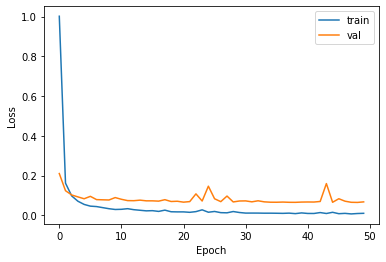

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

In [0]:
%matplotlib inline
c=0
for i in range(50):
    pred = model.predict(x_test[i].reshape(1, 300, 300,3))
    print(""+str(i+1)+" Actual is "+ " " + str(y_test[i])+" Predicted is "+str(pred.argmax()))
    if(pred.argmax()==1):
      c=c+1
print(c)


1 Actual is  [0. 1.] Predicted is 1
2 Actual is  [1. 0.] Predicted is 0
3 Actual is  [1. 0.] Predicted is 0
4 Actual is  [1. 0.] Predicted is 0
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [0. 1.] Predicted is 1
7 Actual is  [1. 0.] Predicted is 0
8 Actual is  [1. 0.] Predicted is 0
9 Actual is  [1. 0.] Predicted is 0
10 Actual is  [1. 0.] Predicted is 1
11 Actual is  [0. 1.] Predicted is 1
12 Actual is  [1. 0.] Predicted is 0
13 Actual is  [1. 0.] Predicted is 0
14 Actual is  [0. 1.] Predicted is 1
15 Actual is  [0. 1.] Predicted is 0
16 Actual is  [1. 0.] Predicted is 0
17 Actual is  [1. 0.] Predicted is 0
18 Actual is  [1. 0.] Predicted is 0
19 Actual is  [0. 1.] Predicted is 1
20 Actual is  [1. 0.] Predicted is 0
21 Actual is  [1. 0.] Predicted is 0
22 Actual is  [0. 1.] Predicted is 1
23 Actual is  [1. 0.] Predicted is 0
24 Actual is  [0. 1.] Predicted is 1
25 Actual is  [1. 0.] Predicted is 0
26 Actual is  [1. 0.] Predicted is 0
27 Actual is  [1. 0.] Predicted is 0
28 Actual 

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.98      0.97       505
     class 1       0.98      0.96      0.97       503

    accuracy                           0.97      1008
   macro avg       0.97      0.97      0.97      1008
weighted avg       0.97      0.97      0.97      1008



In [0]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[497   8]
 [ 20 483]]


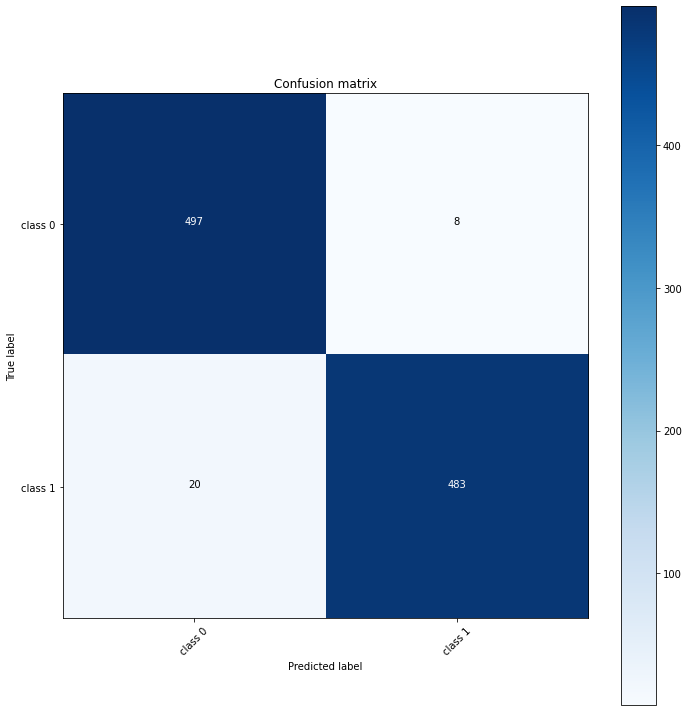

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

In [0]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/assign_deep/aug/old/pcb.h5')

Testing on Balanced Dataset:-

In [0]:
import numpy as np
testx=np.load("/content/drive/My Drive/assign_deep/pcb_b/xtrain.npy")
testy=np.load("/content/drive/My Drive/assign_deep/pcb_b/ytrain.npy")
from keras.utils import to_categorical
testx  = testx.astype('float32')
testy  =  to_categorical(testy)
print(testy[0])

[1. 0.]


In [0]:
mean1 = np.mean(testx)
std1  = np.std(testx)

print(mean1)
print(std1)

testx -= mean1
testx /= std1

52.748867
52.869015


In [0]:
model.evaluate(testx,testy)

298/298 [==============================] - 4s 13ms/step


[0.10774267628248281, 0.9597315192222595]

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

predy = model.predict(testx)
predy = np.argmax(predy, axis=1)
target_names_1 = ['class 0', 'class 1']
print(classification_report(np.argmax(testy,axis=1), predy,target_names=target_names_1))

              precision    recall  f1-score   support

     class 0       0.98      0.94      0.96       149
     class 1       0.94      0.98      0.96       149

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298



Confusion matrix, without normalization
[[140   9]
 [  3 146]]


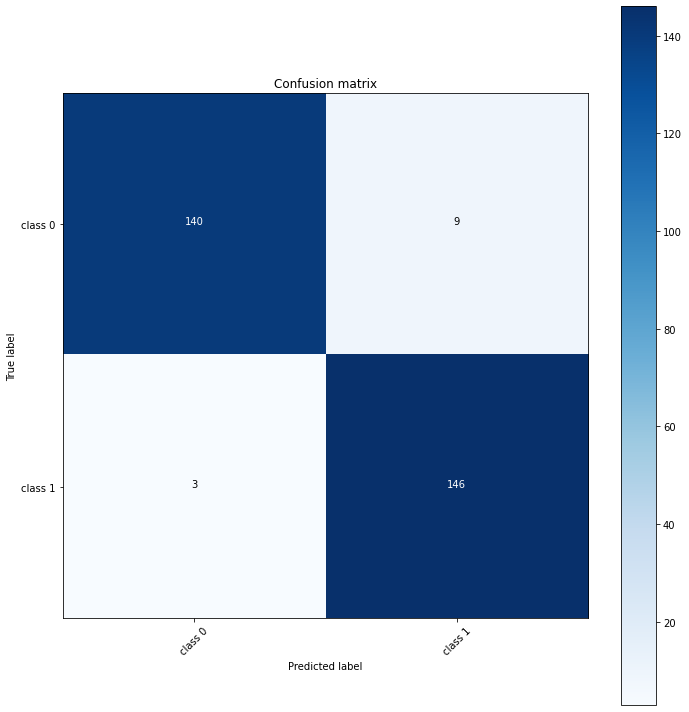

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(testy,axis=1), predy))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names_1,
                      title='Confusion matrix')

Testing on Raw Dataset

In [0]:
test_x=np.load("/content/drive/My Drive/assign_deep/raw_pcb/xtrain.npy")
test_y=np.load("/content/drive/My Drive/assign_deep/raw_pcb/ytrain.npy")



In [0]:
test_x  = test_x.astype('float32')
test_y  =  to_categorical(test_y)
print(test_y[0])

[1. 0.]


In [0]:
import numpy as np

mean2 = np.mean(test_x)
std2  = np.std(test_x)

print(mean2)
print(std2)

test_x -= mean2
test_x /= std2

51.086014
53.93136


In [0]:
#testing on raw

model.evaluate(test_x,test_y)

2669/2669 [==============================] - 33s 12ms/step


[0.057825312311165125, 0.9831397533416748]

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

pred_y = model.predict(test_x)
pred_y = np.argmax(pred_y, axis=1)
target_names_2 = ['class 0', 'class 1']
print(classification_report(np.argmax(test_y,axis=1), pred_y,target_names=target_names_2))

              precision    recall  f1-score   support

     class 0       0.80      0.93      0.86       149
     class 1       1.00      0.99      0.99      2520

    accuracy                           0.98      2669
   macro avg       0.90      0.96      0.93      2669
weighted avg       0.98      0.98      0.98      2669



Confusion matrix, without normalization
[[ 138   11]
 [  34 2486]]


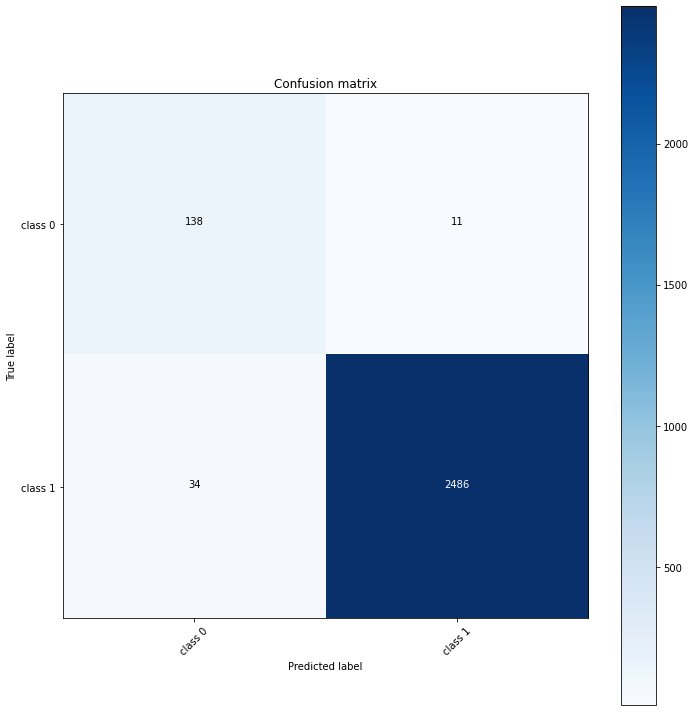

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(test_y,axis=1), pred_y))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names_2,
                      title='Confusion matrix')